**1. Implement and demonstrate the FIND-S algorithm to finding the most specific hypothesis based on a given set of data samples. Read the training data from a .CSV file.**

In [2]:
import csv
a = []
with open('/content/ENJOYSPORT.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)
    print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)
for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'


    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")
    print(hypothesis)

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)


[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'yes'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'no'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'yes']  and is Positive Instance
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

Instance  2 is ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'yes']  and is Positive Instance
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

Instance  3 is ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same'] 

['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

Instance  4 is ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'y

**2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.**

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/ENJOYSPORT.csv")
print(data)
d=np.array(data)[:,:-1]
print("The attributes are \n",d)
target=np.array(data)[:,-1]
print("The target values are",target)
def candidate(c,t):
  print("Initialization of specific and general hypothesis")
  sh=c[0].copy()
  gh=[["?" for i in range(len(sh)) ] for i in range(len(sh))]
  print("Specific hypothesis \n",sh)
  print("General hypothesis \n",gh)
  for i,val in enumerate(c):
    if(t[i]=="yes"):
      for x in range(len(sh)):
       if(val[x]!=sh[x]):
          sh[x]='?'
          gh[x][x]='?'
    if(t[i]=="no"):
      for x in range(len(sh)):
        if(val[x]!=sh[x]):
          gh[x][x]=sh[x]
        else:
          gh[x][x]='?'
  indices=[i for i,val in enumerate(gh)
  if val==['?','?','?','?','?','?',]]
  for i in indices:
    gh.remove(['?','?','?','?','?','?',])
  return sh,gh
s_final,g_final=candidate(d,target)
print("Specific hypothesis \n ", s_final)
print("General hypothesis \n",g_final)


     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        yes
1  Sunny    Warm     High  Strong  Warm     Same        yes
2  Rainy    Cold     High  Strong  Warm   Change         no
3  Sunny    Warm     High  Strong  Cool   Change        yes
The attributes are 
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
The target values are ['yes' 'yes' 'no' 'yes']
Initialization of specific and general hypothesis
Specific hypothesis 
 ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General hypothesis 
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Specific hypothesis 
  ['Sunny' 'Warm' '?' 'Strong' '?' '?']
General hypothesis 
 [['Sunny', '?', 

**3. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test datasets.**

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('tennisdata.csv')
print("The first 5 values of data is :\n",data.head())

X = data.iloc[:,:-1]
print("\nThe First 5 values of train data is\n",X.head())
y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is\n",y.head())

le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)
le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)
le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)
le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train data is :\n",X.head())
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

The first 5 values of data is :
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes

The First 5 values of train data is
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

The first 5 values of Train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is :
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1  

**4. Assuming a set of documents that need to be classified, use the naïve Bayesian classifier model to perform this task. Built-in Java classes /API can be used to write the program. Calculate the accuracy precision and recall for your data set.**

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
df=pd.read_csv("text_classification_4.csv",names=["message","label"])
df
df["label_num"]=df.label.map({"pos":1,"neg":0})
df
x=df.message
y=df.label_num
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

cv=CountVectorizer()
xtrain=cv.fit_transform(x_train)
xtest=cv.transform(x_test)
mnb=MultinomialNB()
mnb.fit(xtrain,y_train)
y_pred=mnb.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(y_pred,y_test))
print("Precision : ",metrics.precision_score(y_pred,y_test))
print("Recall : ",metrics.recall_score(y_pred,y_test))

Accuracy :  0.5
Precision :  0.25
Recall :  0.5


**5. Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis the of heart patients using standard heart disease data set. You can use Java or Python ML Library classes /API.**

In [ ]:
!pip install pgmpy

import pandas as pd
import numpy as np
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
df=pd.read_csv("heart.csv")
df=df.replace('?',np.nan)
model=BayesianNetwork([('age','target'),('sex','target'),('cp','target'),('fbs','target'),('exang','target'),('target','restecg'),('target','chol')])
model.fit(df,estimator=MaximumLikelihoodEstimator)
inference=VariableElimination(model)
q1=inference.query(variables=['target'],evidence={'restecg':1})
print(q1)
q2=inference.query(variables=['target'],evidence={'cp':2})
print(q2)


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4278 |
+-----------+---------------+
| target(1) |        0.5722 |
+-----------+---------------+
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4102 |
+-----------+---------------+
| target(1) |        0.5898 |
+-----------+---------------+


**6. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from io import StringIO


data = pd.read_csv('tennisdata.csv')
print("The first 5 values of data is \n",data.head())

X = data.iloc[:,:-1]
print("\nThe first 5 values of Train data is \n",X.head())
y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is \n",y.head())


le_outlook = LabelEncoder()
X.Outlook =  le_outlook.fit_transform(X.Outlook)
le_Temperature = LabelEncoder()
X.Temperature =  le_Temperature.fit_transform(X.Temperature)
le_Humidity = LabelEncoder()
X.Humidity =  le_Humidity.fit_transform(X.Humidity)
le_Windy = LabelEncoder()
X.Windy =  le_Windy.fit_transform(X.Windy)

print("\nNow the Train data is",X.head())

le_PlayTennis = LabelEncoder()
y =  le_PlayTennis.fit_transform(y)
print("\nNow the Train data is\n",y)

classifier = DecisionTreeClassifier()
classifier.fit(X,y)

def labelEncoderForInput(list1):
    list1[0] =  le_outlook.transform([list1[0]])[0]
    list1[1] =  le_Temperature.transform([list1[1]])[0]
    list1[2] =  le_Humidity.transform([list1[2]])[0]
    list1[3] =  le_Windy.transform([list1[3]])[0]
    return [list1]

inp = ["Rainy","Mild","High","False"]
inp1=["Rainy","Cool","High","False"]
pred1 = labelEncoderForInput(inp1)
y_pred = classifier.predict(pred1)
y_pred
print("\nfor input {0}, we obtain {1}".format(inp1, le_PlayTennis.inverse_transform(y_pred)))


The first 5 values of data is 
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes

The first 5 values of Train data is 
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

The first 5 values of Train output is 
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**7. Build an Artificial Neural Network by implementing the Back
propagation algorithm and test the same using appropriate datasets.**

In [ ]:
import numpy as np
x=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([86],[92],[89]),dtype=float)
x=x/np.amax(x,axis=0)
y=y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

epoch=5
lr=0.1

iln=2
hln=1
oln=1

wh=np.random.uniform(size=(iln,hln))
bh=np.random.uniform(size=(1,hln))
wout=np.random.uniform(size=(hln,oln))
bout=np.random.uniform(size=(1,oln))

for i in range(epoch):
    hinp1=np.dot(x,wh)
    hinp=hinp1+bh
    hlayer_act=sigmoid(hinp)

    oinp1=np.dot(hlayer_act,wout)
    oinp=oinp1+bout
    output=sigmoid(oinp)

    eo=y-output
    outgrad=derivative_sigmoid(output)
    d_output=eo*outgrad

    eh=np.dot(d_output,wout.T)
    hiddgrad=derivative_sigmoid(hlayer_act)
    d_hidd=eh*hiddgrad

    wout=wout+np.dot(hlayer_act.T,d_output)*lr
    wh=wh+np.dot(x.T,d_hidd)*lr

    print("Epoch : ",i+1)
    print("Input : ",x)
    print("Actual output : ",y)
    print("Predicted output : ",output)


Epoch :  1
Input :  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output :  [[0.86]
 [0.92]
 [0.89]]
Predicted output :  [[0.65756223]
 [0.65741649]
 [0.65762567]]
Epoch :  2
Input :  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output :  [[0.86]
 [0.92]
 [0.89]]
Predicted output :  [[0.65962665]
 [0.65935082]
 [0.6597467 ]]
Epoch :  3
Input :  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output :  [[0.86]
 [0.92]
 [0.89]]
Predicted output :  [[0.66166119]
 [0.66125747]
 [0.66183684]]
Epoch :  4
Input :  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output :  [[0.86]
 [0.92]
 [0.89]]
Predicted output :  [[0.66366642]
 [0.66313698]
 [0.66389669]]
Epoch :  5
Input :  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output :  [[0.86]
 [0.92]
 [0.89]]
Predicted output :  [[0.66564293]
 [0.66498986]
 [0.665926

**8. Write a program to implement k-Nearest Neighbor algorithm to classify
there is dataset. Print both correct and wrong predictions. Java /Python
MLlibrary classes can be used for this problem.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

dataset=load_iris()
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],random_state=0)

kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
    prediction=kn.predict(x_new)
    #print("TARGET=",y_test[i],dataset["target_names"] [y_test[i]],"PREDICTED=",prediction,dataset["target_names"][prediction])

print(kn.score(X_test,y_test))

0.9736842105263158


**9. Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set your experiment and draw graphs.**

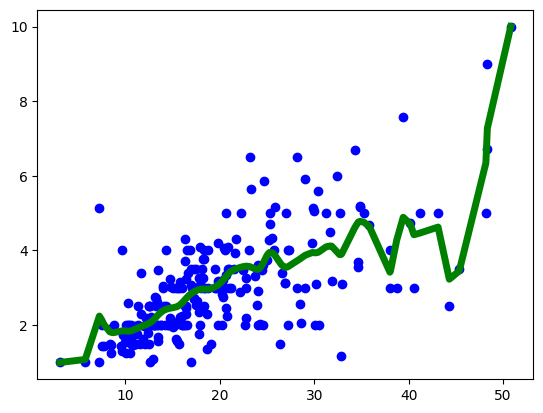

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kernal(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))

    for i in range(m):
        diff=point-xmat[i]
        weights[i,i]=np.exp(diff*diff.T/(-2*k**2))
    return weights

def local_weights(point,xmat,ymat,k):
    wt=kernal(point,xmat,k)
    W=(x.T*(wt*x)).I*(x.T*wt*ymat.T)
    return W

def local_regression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.ones(m)
    for i in range(m):
        ypred[i]=xmat[i]*local_weights(xmat[i],xmat,ymat,k)
    return ypred

df=pd.read_csv("10-dataset .csv")
df
cola=np.array(df.total_bill)
colb=np.array(df.tip)
mcola=np.mat(cola)
mcolb=np.mat(colb)

m=np.shape(mcolb)[1]
one=np.ones((1,m),dtype=int)

x=np.hstack((one.T,mcola.T))
ypred=local_regression(x,mcolb,0.8)

xsort=x.copy()
xsort.sort(axis=0)
plt.scatter(cola,colb,color='blue')
plt.plot(xsort[:,1],ypred[x[:,1].argsort(0)],color='green',linewidth=5)
plt.show()



**10. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm. Compare the results of these (R-20) B.Tech/CSE/2020-2021 Page134two algorithms and comment on the quality of clustering. You can add Java / Python ML library classes/API in the program**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


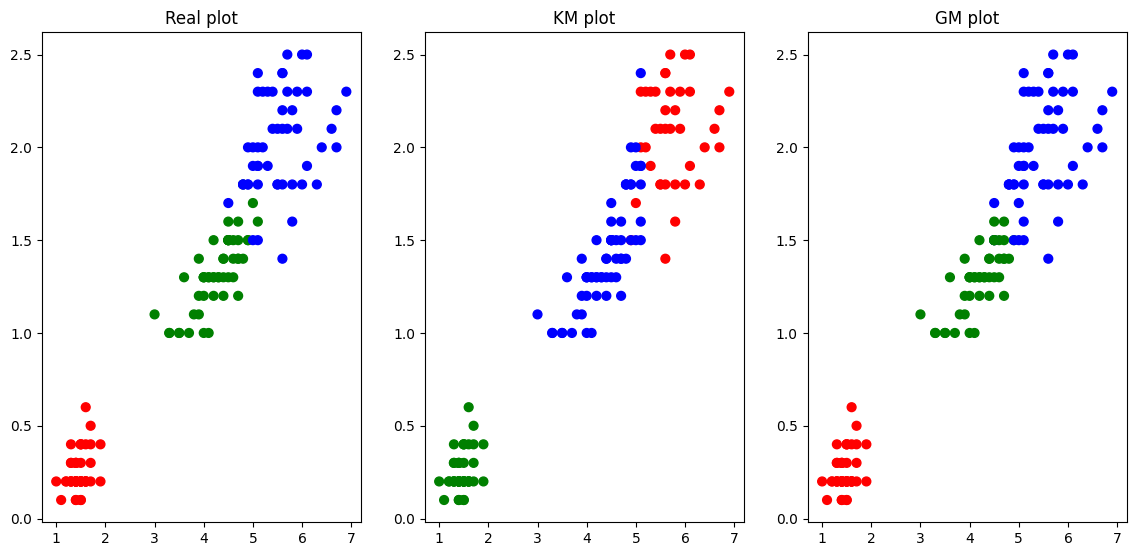

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=["sepal_length","sepal_width","petal_length","petal_width"]
y=pd.DataFrame(iris.target)
y.columns=["target"]

km=KMeans(n_clusters=3)
km.fit(x,y)

plt.figure(figsize=(14,14))
colormap=np.array(["red","green","blue"])

plt.subplot(2,3,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target],s=40)
plt.title("Real plot")

plt.subplot(2,3,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[km.labels_],s=40)
plt.title("KM plot")

scaler=preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=[x.columns])

gm=GaussianMixture(n_components=3)
gm.fit(xs)
gmm_y=gm.predict(xs)

plt.subplot(2,3,3)
plt.scatter(x.petal_length,x.petal_width,c=colormap[gmm_y],s=40)
plt.title("GM plot")
plt.show()

